In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import set_printoptions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import shuffle
from pickle import dump
from pickle import load
import time, datetime
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb

# Get dummy variables if needed

In [3]:
def make_dummy_columns(dfr,column):
    """gets dummy columns for variable

    Args:
    dfr: A dataframe
    column: column you want to break into dummies

    Returns:
    rearranged dataframe with new dummy columns for that variable."""
    df= pd.get_dummies(dfr, columns=[column])
    return df

    



# Move predictor column to end

In [4]:
# Move Y Column to End
def move_class_col(dfr, column_to_move):
    """moves class column to end.

    Args:
    dfr: A dataframe
    column_to_move: column you want to move to the end

    Returns:
    rearranged dataframe with column at end."""
    cols = list(dfr.columns.values) 
    cols.pop(cols.index(column_to_move)) 
    dfr = dfr[cols+[column_to_move]] 
    return dfr



# Train test split and model run

In [5]:
def run_model(model,train_x, train_y, test_x, test_y, X):
    
    print(model)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    predicted = [round(value) for value in y_pred]
    matrix = confusion_matrix(test_y, predicted)
    print(matrix)
    print('precision: ', precision_score(test_y, predicted))
    print('recall: ', recall_score(test_y, predicted))
    print('roc_auc: ', roc_auc_score(test_y, predicted))
    print('accuracy: ', accuracy_score(test_y, predicted))
    print('f1_score:', f1_score(test_y, predicted))
    (pd.Series(model.feature_importances_, index=X.columns[1:21])  #the feature count was hardcoded in
   .nlargest(5)
   .plot(kind='barh'))
    plot_importance(model)
    plt.show()


# Run model and save it if needed

In [9]:
df= pd.read_csv('/Users/jermainemarshall/Documents/2018healthsurveyfiles/testembed.csv')
df['Class-M/F']= df['Class-M/F'].map({1:0, 2:1})
df.head(4)

,User,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,Class-M/F
0,0,0.006339,0.013435,0.018811,-0.019700,-0.007712,-0.006561,-0.011837,0.002235,0.013715,...,-0.008616,-0.010477,-0.016837,0.010246,-0.017267,0.013267,-0.013889,0.012608,0.024783,0
1,1,-0.011396,-0.010239,0.011255,-0.015430,-0.014016,-0.022244,0.013638,0.001620,0.010986,...,0.003971,0.000393,0.000462,-0.022231,0.021627,-0.001613,0.005333,-0.018984,0.018298,1
2,2,-0.016668,0.022110,0.021948,-0.001762,-0.019154,-0.002592,0.002417,0.010360,0.016707,...,-0.001475,0.014644,-0.002301,-0.014852,0.012841,-0.001871,0.014378,-0.021299,-0.010373,1
3,3,0.009591,-0.004218,0.016497,0.019352,-0.021226,-0.000176,-0.001032,0.011265,0.001572,...,-0.013131,0.022726,-0.021179,0.010011,-0.002836,-0.011071,0.006305,-0.019924,-0.003723,1


In [7]:
df.shape
    #df= pd.read_csv('/Users/jermainemarshall/Documents/intenders_conversion_prediction_no_w2v.csv')
    #df= pd.read_csv('/Users/jermainemarshall/Documents/intenders_conversion_prediction_exclude_inside_pass_salesgrp.csv')
    #df= pd.read_csv('/Users/jermainemarshall/Documents/intenders_conversion_prediction_kitchenaid_only.csv') 
    

(1009, 22)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
       colsample_bytree=1, gamma=3, learning_rate=1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=9,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=3, silent=True,
       subsample=0.99)
[[ 74 158]
 [ 78 195]]
precision:  0.5524079320113314
recall:  0.7142857142857143
roc_auc:  0.5166256157635468
accuracy:  0.5326732673267327
f1_score: 0.6230031948881789


/Users/jermainemarshall/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


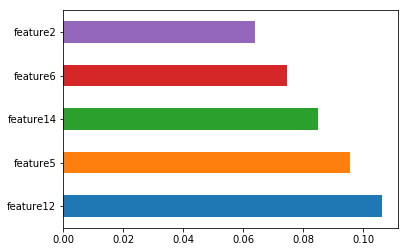

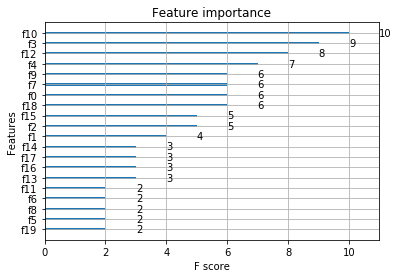

In [51]:
if __name__ == '__main__':
    #df= pd.read_csv('/Users/jermainemarshall/Documents/intenders_conversion_prediction_no_w2v.csv')
    #df= pd.read_csv('/Users/jermainemarshall/Documents/intenders_conversion_prediction_exclude_inside_pass_salesgrp.csv')
    #df= pd.read_csv('/Users/jermainemarshall/Documents/intenders_conversion_prediction_kitchenaid_only.csv') 
    #df= pd.read_csv('/Users/jermainemarshall/Documents/2018healthsurveyfiles/testembed.csv')
    #df= pd.read_csv('/Users/jermainemarshall/Documents/intenders_conversion_prediction_inside_pass_salesgrp.csv')
    #df= pd.read_csv('/Users/jermainemarshall/Documents/intenders_conversion_prediction_include_inside_pass_salesgrp_no_msrp.csv')
    #df=pd.read_csv('/Users/jermainemarshall/Documents/intenders_conversion_prediction_all_passes_with_msrp.csv')
    #df= make_dummy_columns(df,"")
    
    #df=move_class_col(df,"converted")
    
    #Fill null values 
    #df = df.fillna("impute") fill null values if needed
    #df=df.drop_duplicates() get rid of potential duplicates (none in this case)
    #df.describe() stats of the data
    
    #df= df[['INTENT_Code','BRAND_Code',
    #   'MAIN_GROUP_Code','STATE', 'email_clickthrough', 'recency', 'frequency', 'monetary_value',
    #   'r_quartile', 'f_quartile', 'm_quartile','MSRP','MAIN_GROUP_CD', 'converted']].copy()
    
    
    #df= df[['INTENT_Code','BRAND_Code',
    #   'MAIN_GROUP_Code','STATE', 'email_clickthrough', 'recency', 'frequency', 'monetary_value',
    #   'r_quartile', 'f_quartile', 'm_quartile','MSRP','MAIN_GROUP_CD', 'converted']].copy()
    df = shuffle(df)
    dataset = df.values
    
    seed=7
    
    X = dataset[:,1:21]
    scaler = Normalizer().fit(X)
    X = scaler.transform(X)
    Y = dataset[:,21]
    Y= Y.astype(int)
    X = X.astype('float32')
    # split data into train and test sets
    #model will output the confusion matrix, precision, recall, roc_auc, and f1_curve. Will also print feature 
    #importances
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=seed)
    #The below parameters were the best so far though it can vary 2-4 depending on seed%.
    xgb_model=XGBClassifier(learning_rate=1, n_estimators=9, max_depth= 5, subsample= 0.99, colsample_bylevel=1.0,
                       gamma=3,scale_pos_weight=3, min_child_weight= 5,seed=3)
    run_model(xgb_model,X_train, Y_train, X_test, Y_test,df)    
    

In [ ]:
import seaborn as sns
corr=df.iloc[:,1:21].corr()
#corr= corr.fillna(0)
#df_slice1= df_slice1.fillna(0)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, vmin= -1, vmax=1,linewidths=.5,  center=0, ax=ax)

In [9]:
df.converted.value_counts(normalize= True)
df.head(10)

,INTENT_Code,BRAND_Code,MAIN_GROUP_Code,STATE,email_clickthrough,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,MSRP,MAIN_GROUP_CD,converted
50020,16,3,8,20,-0.069133,1194,1,11.06,4,4,3,49.99,20200.0,0
16690,47,3,8,5,-0.066444,847,6,113.10,3,1,1,169.99,20200.0,0
29014,48,3,8,15,-0.100515,1922,2,4.90,4,2,4,499.99,20200.0,1
11324,53,3,8,36,NaN,1481,1,19.66,4,4,3,129.99,20200.0,0
36407,35,3,8,44,-0.028775,434,4,368.44,2,1,1,149.99,20200.0,0
45170,36,3,8,6,-0.110651,1624,1,25.59,4,4,3,339.99,20200.0,0
22472,24,3,8,30,-0.056002,1363,1,2.66,4,4,4,129.99,20200.0,0
58759,32,3,8,38,NaN,847,1,25.95,3,4,3,99.99,20200.0,0
53848,53,3,8,7,-0.003119,69,8,941.04,1,1,1,499.99,20200.0,0
31067,27,3,8,6,NaN,798,4,2112.92,3,1,1,519.99,20200.0,0
